In [1]:
import pandas as pd
import numpy as np

<h1>Preprocessing</h1>

<h3>Loading the CSV file and creating column headers</h3>

In [2]:
df = pd.read_csv("steam-200k.csv")

headers = ["user_id", "game", "played", "hours_played", "0"]

df.columns = headers
df.drop(["0"], axis=1)
df.head()

,user_id,game,played,hours_played,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [3]:
print("Number of games in dataset:", len(df["game"].unique()))

Number of games in dataset: 5155


<h3>Check for missing values</h3>

In [4]:
df.isnull().any()

user_id         False
game            False
played          False
hours_played    False
0               False
dtype: bool

<h3>Changing "played" column to <span style="color:green;"><i>true</i></span> for users who actually played the game and <span style="color:red;"><i>false</i></span> for those who just purchased the game.</h3>

In [5]:
df['played'].replace({'play': 1, 'purchase': 0}, inplace=True)

In [6]:
df.head()

,user_id,game,played,hours_played,0
0,151603712,The Elder Scrolls V Skyrim,1,273.0,0
1,151603712,Fallout 4,0,1.0,0
2,151603712,Fallout 4,1,87.0,0
3,151603712,Spore,0,1.0,0
4,151603712,Spore,1,14.9,0


<h1>Performing K-means with dataset for prediction</h1>

<h3>Importing Sklearn Essentials</h3>

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
X = df[['played', 'hours_played']]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
k = 50  # Replace with the desired number of clusters
kmeans = KMeans(n_clusters=k)
df['cluster'] = kmeans.fit_predict(X_scaled)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
X_scaled

array([[1.00000000e+00, 2.32178256e-02],
       [0.00000000e+00, 7.65703298e-05],
       [1.00000000e+00, 7.39329074e-03],
       ...,
       [1.00000000e+00, 1.19109402e-04],
       [0.00000000e+00, 7.65703298e-05],
       [1.00000000e+00, 1.10601588e-04]])

<h1>Trial</h1>

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

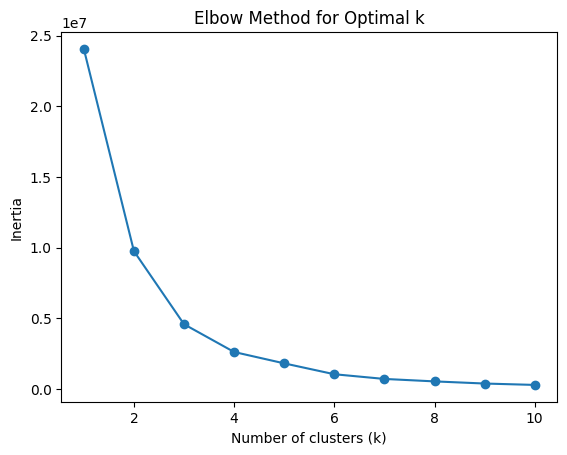

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

Enter the optimal number of clusters based on the analysis:  3


['Dota 2' 'Counter-Strike Global Offensive']


/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/jr/99b35g1s4m1_pddtcv9m0qmc0000gn/T/ipykernel_48359/1398718262.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.labels_


In [231]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("steam-200k.csv")

headers = ["user_id", "game", "played", "hours_played", "0"]
df.columns = headers
df = df.drop(["0"], axis=1)  # Assign the modified DataFrame back to df

# Filter the dataset based on the selected game
selected_game = 'The Elder Scrolls V Skyrim'
df_selected = df[df['game'] == selected_game]

# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected[['hours_played']])
    inertias.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_selected[['hours_played']])
    silhouette_scores.append(silhouette_score(df_selected[['hours_played']], kmeans.labels_))

# Choose the best number of clusters based on user input
best_k = int(input("Enter the optimal number of clusters based on the analysis: "))

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(df_selected[['hours_played']])

# Get the cluster label for each row in the filtered dataset
df_selected['cluster'] = kmeans.labels_

# Get the mean hours played for each cluster
cluster_means = df_selected.groupby('cluster')['hours_played'].mean()

# Filter out games played by less than 100 players
df_filtered = df[df.groupby('game')['user_id'].transform('count') >= 100]

# Find the cluster with the highest mean hours played
best_cluster = cluster_means.idxmax()

# Get the top 5 games with the closest mean hours played to the best cluster mean
mean_of_best_cluster = cluster_means[best_cluster]
suggested_games = df_filtered[(df_filtered['game'] != selected_game) & 
                              (df_filtered['hours_played'] >= mean_of_best_cluster - 5) & 
                              (df_filtered['hours_played'] <= mean_of_best_cluster + 5)].sort_values('hours_played', ascending=False)['game'].unique()[:5]
print(suggested_games)


In [177]:
len(df['game'].unique())

5155

In [2]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("steam-200k.csv")

headers = ["user_id", "game", "played", "hours_played", "0"]
df.columns = headers
df = df.drop(["0"], axis=1)  # Assign the modified DataFrame back to df

matrix = df.pivot_table(columns='game', index='user_id', values='hours_played')
matrix = matrix.dropna(thresh=5, axis=0)
matrix = df.pivot_table(columns='game', index='user_id', values='hours_played', fill_value=0)

def center(row):
    new_row = (row - row.mean()) / (row.max() - row.min())
    return new_row

matrix_std = matrix.apply(center)

# Standardize the matrix_std using StandardScaler
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(matrix_std), columns=matrix_std.columns, index=matrix_std.index)

def gameRec(g):
    dota = df_norm[g]
    dota_corr = df_norm.corrwith(dota).dropna()
    
    # Create a DF to show how many times each game has been played and the mean time it has been played
    gameData = df.groupby('game').agg({'hours_played': [np.size, np.mean]})
    
    # Reset the index of gameData to avoid MultiIndex issues
    gameData = gameData.reset_index()
    
    # Convert dota_corr to a DataFrame with a single-level index
    dota_corr_df = pd.DataFrame({'game': dota_corr.index, 'similarity': dota_corr.values})
    
    # Convert gameData to have a single-level index
    gameData.columns = ['game', 'size', 'mean']
    
    # Filter out any game played by fewer than 100 players.
    gameSim = gameData['size'] >= 100
    
    # Merge DataFrames
    df_result = pd.merge(gameData[gameSim], dota_corr_df, on='game')
    
    return df_result.sort_values(['similarity'], ascending=False)[:6]

result = gameRec('The Elder Scrolls V Skyrim')
print(result)

                                        game  size       mean  similarity
354               The Elder Scrolls V Skyrim  1393  51.403661    1.000000
356  The Elder Scrolls V Skyrim - Dragonborn   365   1.000000    0.420727
313      Skyrim High Resolution Texture Pack   235   1.000000    0.419230
355   The Elder Scrolls V Skyrim - Dawnguard   378   1.000000    0.412891
357  The Elder Scrolls V Skyrim - Hearthfire   367   1.000000    0.374555
231         Medal of Honor(TM) Single Player   156   2.098077    0.312988


/var/folders/jr/99b35g1s4m1_pddtcv9m0qmc0000gn/T/ipykernel_1033/1267923414.py:34: FutureWarning: The provided callable <function mean at 0x10659dbc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gameData = df.groupby('game').agg({'hours_played': [np.size, np.mean]})


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("steam-200k.csv")

headers = ["user_id", "game", "played", "hours_played", "0"]
df.columns = headers
df = df.drop(["0"], axis=1)  # Assign the modified DataFrame back to df

matrix = df.pivot_table(columns='game', index='user_id', values='hours_played')
matrix = matrix.dropna(thresh=5, axis=0)
matrix = df.pivot_table(columns='game', index='user_id', values='hours_played', fill_value=0)

def center(row):
    new_row = (row - row.mean()) / (row.max() - row.min())
    return new_row

matrix_std = matrix.apply(center)

# Standardize the matrix_std using StandardScaler
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(matrix_std), columns=matrix_std.columns, index=matrix_std.index)

def gameRec(input_games):
    # Get the subset of the DataFrame for the input games
    input_data = df_norm[input_games]
    
    # Calculate the mean of the input games
    input_mean = input_data.mean(axis=1)
    
    # Calculate the correlation with the mean of the input games
    corr_with_input = df_norm.corrwith(input_mean).dropna()
    
    # Create a DataFrame to show how many times each game has been played and the mean time it has been played
    gameData = df.groupby('game').agg({'hours_played': [np.size, np.mean]})
    
    # Reset the index of gameData to avoid MultiIndex issues
    gameData = gameData.reset_index()
    
    # Convert corr_with_input to a DataFrame with a single-level index
    corr_df = pd.DataFrame({'game': corr_with_input.index, 'similarity': corr_with_input.values})
    
    # Convert gameData to have a single-level index
    gameData.columns = ['game', 'size', 'mean']
    
    # Filter out any game played by fewer than 100 players.
    gameSim = gameData['size'] >= 100
    
    # Merge DataFrames
    df_result = pd.merge(gameData[gameSim], corr_df, on='game')
    
    return df_result.sort_values(['similarity'], ascending=False)[:(len(input_games) + 5)]

# Example usage with a list of input games
input_games = ['The Elder Scrolls V Skyrim', 'DayZ', 'Half-Life 2', 'Counter-Strike Global Offensive']
result = gameRec(input_games)
print(result)

                                        game  size        mean  similarity
91           Counter-Strike Global Offensive  2789  116.236501    0.554463
106                                     DayZ   495   41.544242    0.535578
186                              Half-Life 2   995    4.923920    0.526929
354               The Elder Scrolls V Skyrim  1393   51.403661    0.526468
188                  Half-Life 2 Episode One   542    2.283764    0.393524
189                  Half-Life 2 Episode Two   506    2.935178    0.369058
313      Skyrim High Resolution Texture Pack   235    1.000000    0.307547
356  The Elder Scrolls V Skyrim - Dragonborn   365    1.000000    0.307170
355   The Elder Scrolls V Skyrim - Dawnguard   378    1.000000    0.303907


/var/folders/jr/99b35g1s4m1_pddtcv9m0qmc0000gn/T/ipykernel_1033/3310163062.py:37: FutureWarning: The provided callable <function mean at 0x10659dbc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gameData = df.groupby('game').agg({'hours_played': [np.size, np.mean]})
